In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
df = pd.read_csv('~/ds_bootcamp/real_project_bootcamp/Release 2.0/data.csv')

In [296]:
#Удаление повторяющихся значений
df.drop_duplicates(subset=['address', 'mobile_numbers', 'square_m2', 'subway', 'price_per_m', 'ceiling_height'], inplace=True)

In [297]:
# Удаление ненужных столбцов
df.drop(['price', 'mobile_numbers', 'description', 'additionally', 'city_name'], axis=1, inplace=True)

In [298]:
# 1 = Квартира
df.loc[:, 'type'] = 1

In [299]:
df['subway'] = df['subway'].str.strip()
# Мы создали словарь subway_dict в котором каждому названию метро присваивается числовое значение.
subway_dict = {v:i for i, v in enumerate(df['subway'].value_counts().index)}
# Кждому значению в столбце мы присвоили значение словаре
df['subway'] = df['subway'].apply(lambda x: subway_dict[x])

In [300]:
# В каждом значении столбца адресс мы оставили только название улицы, с помощью силы split
df['address'] = [i.split(', ')[1].title() for i in df['address']]

In [301]:
# Мы создали словарь subway_dict в котором каждому названию метро присваивается числовое значение.
address_dict = {v:i for i, v in enumerate(df['address'].value_counts().index)}
# Кждому значению в столбце мы присвоили значение словаре
df['address'] = df['address'].apply(lambda x: address_dict[x])

In [302]:
# адреса
# subway_dict = {v:i for i, v in enumerate(df['subway'].value_counts().index)}
# df['subway'] = df['subway'].apply(lambda x: subway_dict[x])

In [303]:
# Есть мусоропровод - 1
# Нет мусоропровода - 0
l = []
for i in df['trash_сhute']:
    if i == 'Да':
        l.append(1)
    else:
        l.append(0)
df['trash_сhute'] = l

In [304]:
# Есть залог = 1
# Нет залога = 0
df['rent_deposit'] = df['rent_deposit'].apply(lambda x: int(x))

In [305]:
# Коммунальные услгуи включены = 1
# Коммунальные услуги не включены = 0
df['utilities'] = df['utilities'].apply(lambda x: int(x))

In [306]:
# извлечем этаж
df['floor'] = df['building_type'].dropna().apply(lambda x: x.split('/')[0])
df['floor'] = pd.to_numeric(df['floor'])

In [307]:
# извлечем сколько этажей в доме
df['storeys_house'] = df['building_type'].dropna().apply(lambda x: x.split('/')[1].split(',')[0])
df['storeys_house'] = pd.to_numeric(df['storeys_house'])

In [308]:
def extract_type_hous(value):
    parts = value.split(', ')
    if len(parts) > 1:
        return parts[1]
    return np.nan
df['type_house'] = df['building_type'].dropna().apply(extract_type_hous)

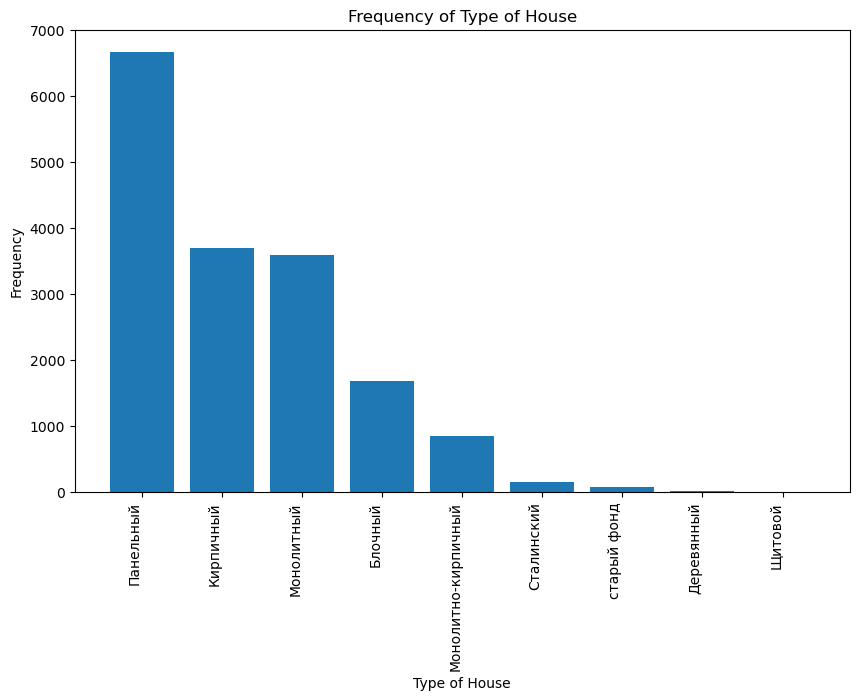

In [309]:
# построим график - посмотрим какой тип дома встречается чаще всего
a1 = df['type_house'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(x=a1.index, height=a1.values)
plt.xlabel('Type of House')
plt.ylabel('Frequency')
plt.title('Frequency of Type of House')
plt.xticks(rotation=90, ha='right');

In [310]:
# панельный тип дома - мода, заменим отсутсвующие значения модой
df['type_house'] = df['type_house'].fillna('Панельный')
# так как Деревянный и Щитовой тип также заменим модой, так как их мал'
df['type_house'] = df['type_house'].replace(['Деревянный', 'Щитовой'],['Панельный', 'Панельный'])

In [311]:
mapping = {'Панельный': 1, 'Кирпичный': 2, 'Монолитный': 3, 'Блочный': 4, 'Монолитно-кирпичный': 5, 'Сталинский': 6, 'старый фонд': 7}
# Заменяем значения в столбце “Тип_дома” согласно словарю mapping
df['type_house'].replace(mapping, inplace=True)
# Удаляем разобранный столбец
df.drop('building_type', axis=1, inplace=True)

In [312]:
#Заменил значения Косметический': 3, 'Евроремонт': 2, 'Дизайнерский':1, 'Без ремонта':0 
replace_dict = {'Косметический': 3, 'Евроремонт': 2, 'Дизайнерский':1, 'Без ремонта':0}
df['renovation'].replace(replace_dict, inplace=True)

In [313]:
windows_dickt = {v:i for i, v in enumerate(df['view_from_the_window'].value_counts().index)}
df['view_from_the_window'] = df['view_from_the_window'].apply(lambda x: windows_dickt[x])

In [337]:
# plt.figure(figsize= (16,10))
# sns.heatmap(df.corr(),mask=mask, annot=True, annot_kws={"size": 14}) 
# sns.set_style() 
# plt.xticks(fontsize=14) 
# plt.yticks(fontsize=14) 
# plt.show()
!pip install pandas-profiling[notebook]

zsh:1: no matches found: pandas-profiling[notebook]
